# Drone Detection - Inference Demo

This notebook demonstrates how to use the trained YOLOv8 model for drone detection.

In [2]:
import sys
sys.path.append('..')

from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

## Load Model

Load your trained model checkpoint:

In [3]:
# Path to your trained model
model_path = "../models/checkpoints/drone_detection/weights/best.pt"

# Load model
model = YOLO(model_path)
print(f"Model loaded from: {model_path}")
print(f"Classes: {model.names}")

Model loaded from: ../models/checkpoints/drone_detection/weights/best.pt
Classes: {0: 'drone', 1: 'not-drone'}


## Run Inference on Test Images

In [4]:
# Get some test images
test_images_dir = Path("../data/processed/drone-vs-bird-binary/test/images")
test_images = list(test_images_dir.glob("*.jpg"))[:5]  # Get first 5 images

print(f"Found {len(test_images)} test images")

Found 5 test images



0: 384x640 1 drone, 32.6ms
1: 384x640 1 not-drone, 32.6ms
2: 384x640 1 drone, 32.6ms
3: 384x640 1 drone, 32.6ms
4: 384x640 1 drone, 32.6ms
Speed: 3.2ms preprocess, 32.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


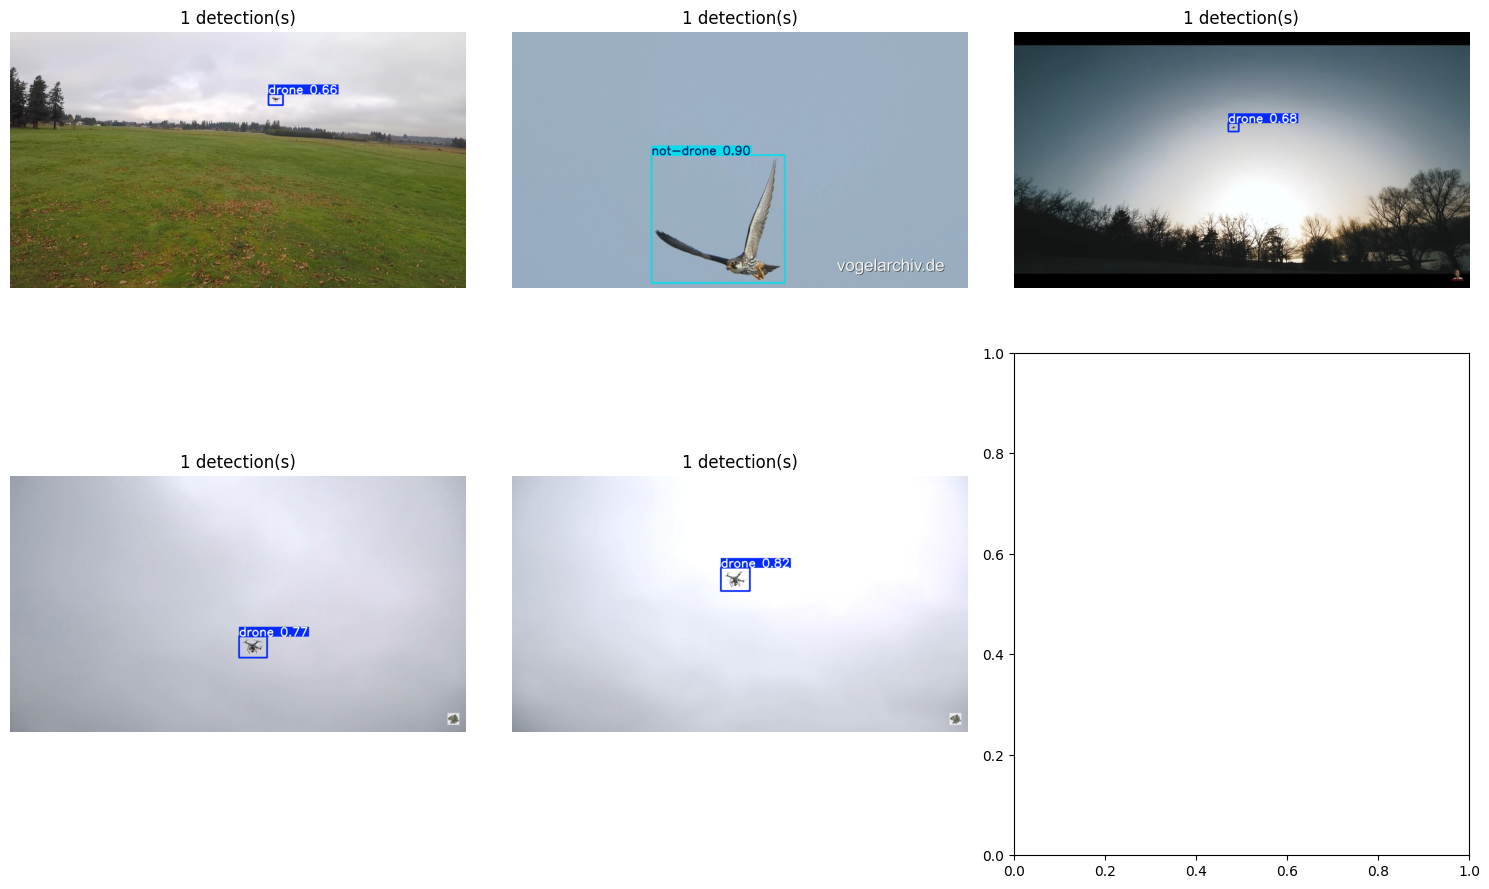

In [5]:
# Run inference
results = model.predict(test_images, conf=0.25)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (result, ax) in enumerate(zip(results, axes)):
    if i >= len(results):
        ax.axis('off')
        continue
    
    # Get annotated image
    img = result.plot()
    
    # Convert BGR to RGB
    img = img[:, :, ::-1]
    
    # Display
    ax.imshow(img)
    ax.axis('off')
    
    # Add detection info
    detections = len(result.boxes)
    ax.set_title(f"{detections} detection(s)", fontsize=12)

plt.tight_layout()
plt.show()

## Detailed Detection Info

In [6]:
# Show detailed info for first result
result = results[0]

print(f"Image: {result.path}")
print(f"Image size: {result.orig_shape}")
print(f"\nDetections: {len(result.boxes)}\n")

for i, box in enumerate(result.boxes):
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    xyxy = box.xyxy[0].cpu().numpy()
    class_name = model.names[cls]
    
    print(f"Detection {i+1}:")
    print(f"  Class: {class_name}")
    print(f"  Confidence: {conf:.2%}")
    print(f"  Bounding Box: [{xyxy[0]:.1f}, {xyxy[1]:.1f}, {xyxy[2]:.1f}, {xyxy[3]:.1f}]")
    print(f"  Center: ({(xyxy[0]+xyxy[2])/2:.1f}, {(xyxy[1]+xyxy[3])/2:.1f})")
    print(f"  Size: {xyxy[2]-xyxy[0]:.1f} x {xyxy[3]-xyxy[1]:.1f}")
    print()

Image: ../data/processed/drone-vs-bird-binary/test/images/b-878-_png_jpg.rf.c3db65ce22c8f65427700465435204a1.jpg
Image size: (1080, 1920)

Detections: 1

Detection 1:
  Class: drone
  Confidence: 66.21%
  Bounding Box: [1088.5, 265.5, 1149.1, 311.3]
  Center: (1118.8, 288.4)
  Size: 60.7 x 45.9



## Run on Custom Image

In [7]:
# Specify path to your image
custom_image = "path/to/your/image.jpg"

# Run inference
result = model.predict(custom_image, conf=0.25)[0]

# Display
img = result.plot()
img = img[:, :, ::-1]  # BGR to RGB

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title(f"Detected {len(result.boxes)} object(s)")
plt.show()

# Print details
for box in result.boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    class_name = model.names[cls]
    print(f"{class_name}: {conf:.2%} confidence")

FileNotFoundError: path/to/your/image.jpg does not exist

## Save Results

In [ ]:
# Save annotated images
output_dir = Path("../results/demo_predictions")
output_dir.mkdir(parents=True, exist_ok=True)

results = model.predict(test_images, save=True, project=str(output_dir.parent), name=output_dir.name)

print(f"✓ Results saved to: {output_dir}")